In [1]:
# To find pearson, spearman's and kendell tao correlation for two given data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data set
df_1=pd.read_excel('DATASET_1.xlsx')
df_2=pd.read_excel('DATASET_2.xlsx')

In [3]:
df_1

,X,Y
0,0,0
1,1,3
2,2,6
3,3,8
4,5,11
5,7,13
6,9,14
7,12,15
8,16,16
9,20,16


In [4]:
df_2

,X,Y
0,2,8
1,3,4
2,4,9
3,5,2
4,6,5
5,7,6
6,8,3
7,9,1
8,10,7
9,20,17


In [5]:
# plot the dataframe
def plot_df(x,y):
    plt.figure(figsize=(20,8))
    plt.plot(x,y,color='black',label='dataset plot')
    plt.scatter(x,y,color='blue',s=100)
    plt.legend()
    plt.grid()
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.show()

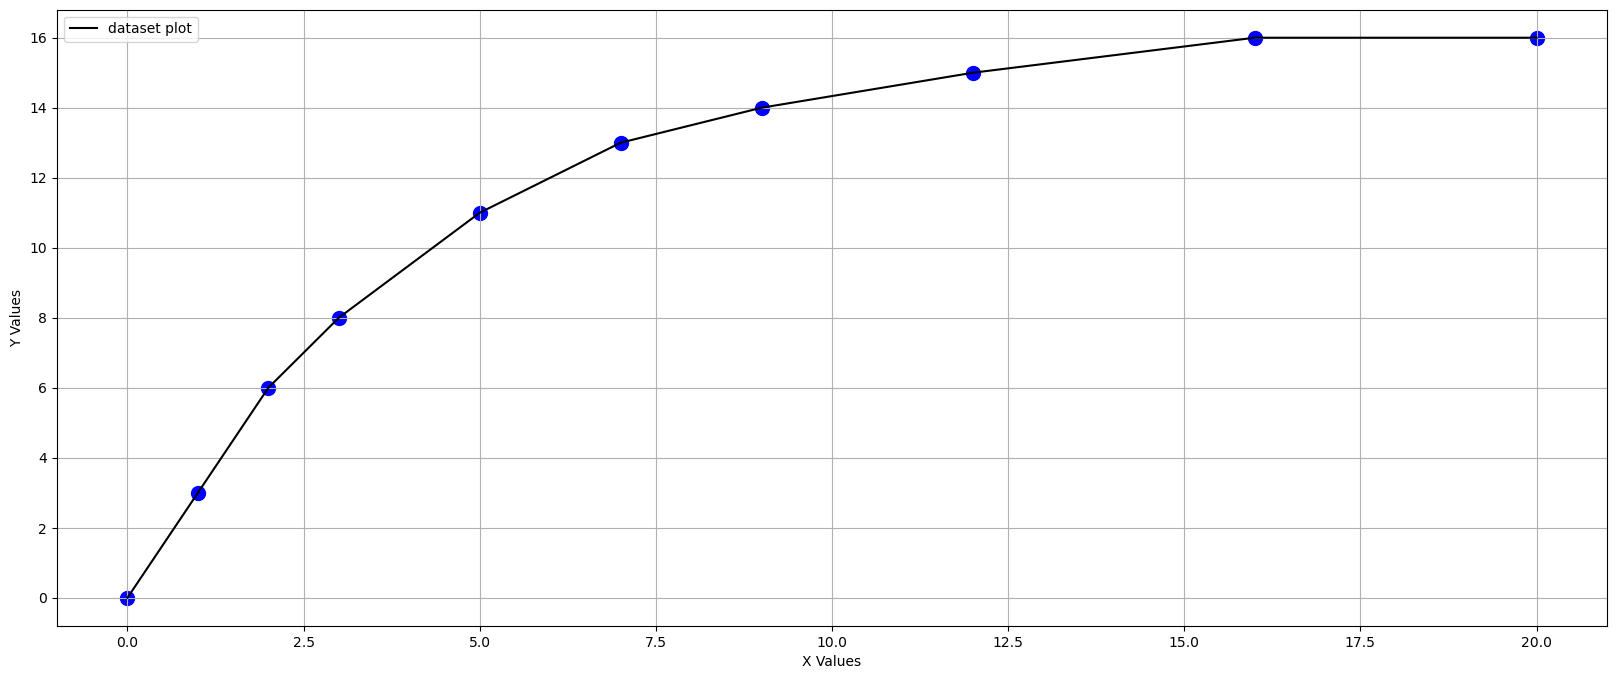

In [6]:
df_1_plot=plot_df(df_1['X'],df_1['Y'])
df_1_plot

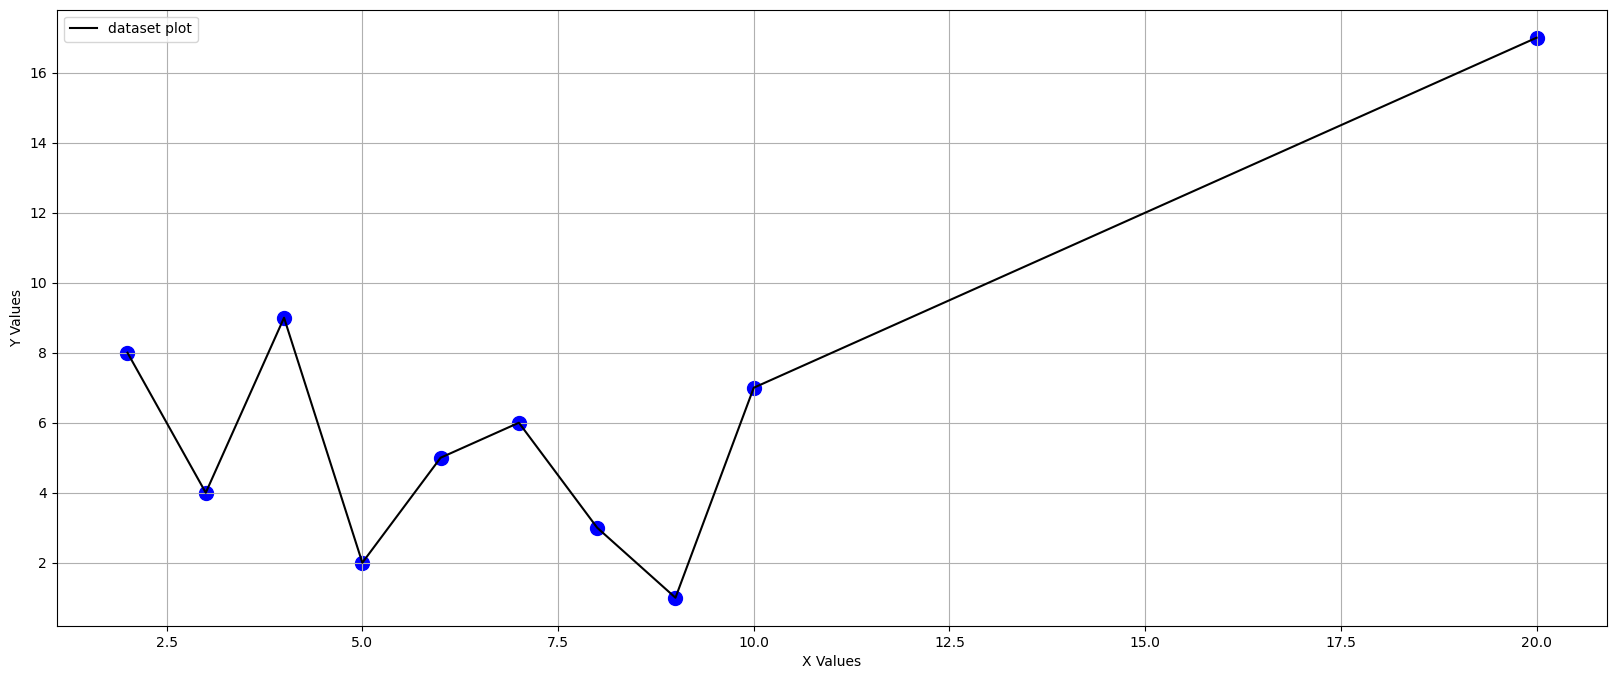

In [7]:
df_2_plot=plot_df(df_2['X'],df_2['Y'])
df_2_plot

In [8]:
# To calculate pearson correlation 
def pearson_corr(x,y):
    mean_1=x.sum()/len(x)
    mean_2=y.sum()/len(y)
# calculating the co-variance,standard deviation and correlation coefficient
    for i in range(0,len(x)):
        co_var_sum=((x-mean_1)*(y-mean_2)).sum()
        std_1_sum=((x-mean_1)**2).sum()
        std_2_sum=((y-mean_2)**2).sum()
    co_var=co_var_sum/(len(x)-1) #co-variance
    std_1=(std_1_sum/(len(x)-1))**0.5 #standard deviation 1
    std_2=(std_2_sum/(len(x)-1))**0.5 #standard deviation 2
    r=co_var/(std_1*std_2) # pearson correlation coefficient
    return r

In [9]:
pearson_df_1=pearson_corr(df_1['X'],df_1['Y'])
print('The pearson correlation coefficient for dataset 1 is {}'.format(np.round(pearson_df_1,4))) #Dataset 1

The pearson correlation coefficient for dataset 1 is 0.8772


In [10]:
pearson_df_2=pearson_corr(df_2['X'],df_2['Y'])
print('The pearson correlation coefficient for dataset 2 is {}'.format(np.round(pearson_df_2,4))) #dataset 2

The pearson correlation coefficient for dataset 2 is 0.615


In [63]:
# To calculate spearman's correlation coefficient
def spearman_corr(x, y):
    def rank(data):
        rank_list = [1] * len(data)  # Initialize ranks to 1
        for i in range(len(data)):
            for j in range(len(data)):
                if data[j] < data[i]:
                    rank_list[i] += 1
        return rank_list
    rank_x = rank(x)
    rank_y = rank(y)
    rank_df = pd.DataFrame({'Rank_x': pd.Series(rank_x), 'Rank_y': pd.Series(rank_y)})
    n = len(rank_df)
    d = (rank_df['Rank_x'] - rank_df['Rank_y'])
    rk = 1 - (6 * (d**2).sum()) / (n * (n**2 - 1))
    return rk  

In [64]:
rank_df_1=spearman_corr(df_1['X'],df_1['Y'])
print("The spearman's correlation coefficient for dataset 1 is {}".format(np.round(rank_df_1,4))) #Dataset 1

The spearman's correlation coefficient for dataset 1 is 0.9939


In [65]:
rank_df_2=spearman_corr(df_2['X'],df_2['Y'])
print("The spearman's correlation coefficient for dataset 2 is {}".format(np.round(rank_df_2,4))) #Dataset 2

The spearman's correlation coefficient for dataset 2 is 0.0182


In [66]:
def kendall_tau(x, y):
    concordant = discordant = 0
    
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            # Check for concordant and discordant pairs
            if (x[i] < x[j] and y[i] < y[j]) or (x[i] > x[j] and y[i] > y[j]):
                concordant += 1
            elif (x[i] < x[j] and y[i] > y[j]) or (x[i] > x[j] and y[i] < y[j]):
                discordant += 1
    
    # Calculate Kendall's Tau
    n = len(x)
    tau = (concordant - discordant) / ((n * (n - 1)) / 2)
    
    return tau

In [67]:
kendell_df_1=kendall_tau(df_1['X'],df_1['Y'])
print("The kendell tau's correlation coefficient for dataset 1 is {}".format(np.round(kendell_df_1,4))) #Dataset 1

The kendell tau's correlation coefficient for dataset 1 is 0.9778


In [68]:
kendell_df_2=kendall_tau(df_2['X'],df_2['Y'])
print("The kendell tau's correlation coefficient for dataset 2 is {}".format(np.round(kendell_df_2,4))) #Dataset 2

The kendell tau's correlation coefficient for dataset 2 is 0.0222


In [212]:
df_3=df_1.copy()
df_3['Y'][9]=100
df_3 # with changed data from dataset 1

,X,Y
0,0,0
1,1,3
2,2,6
3,3,8
4,5,11
5,7,13
6,9,14
7,12,15
8,16,16
9,20,100


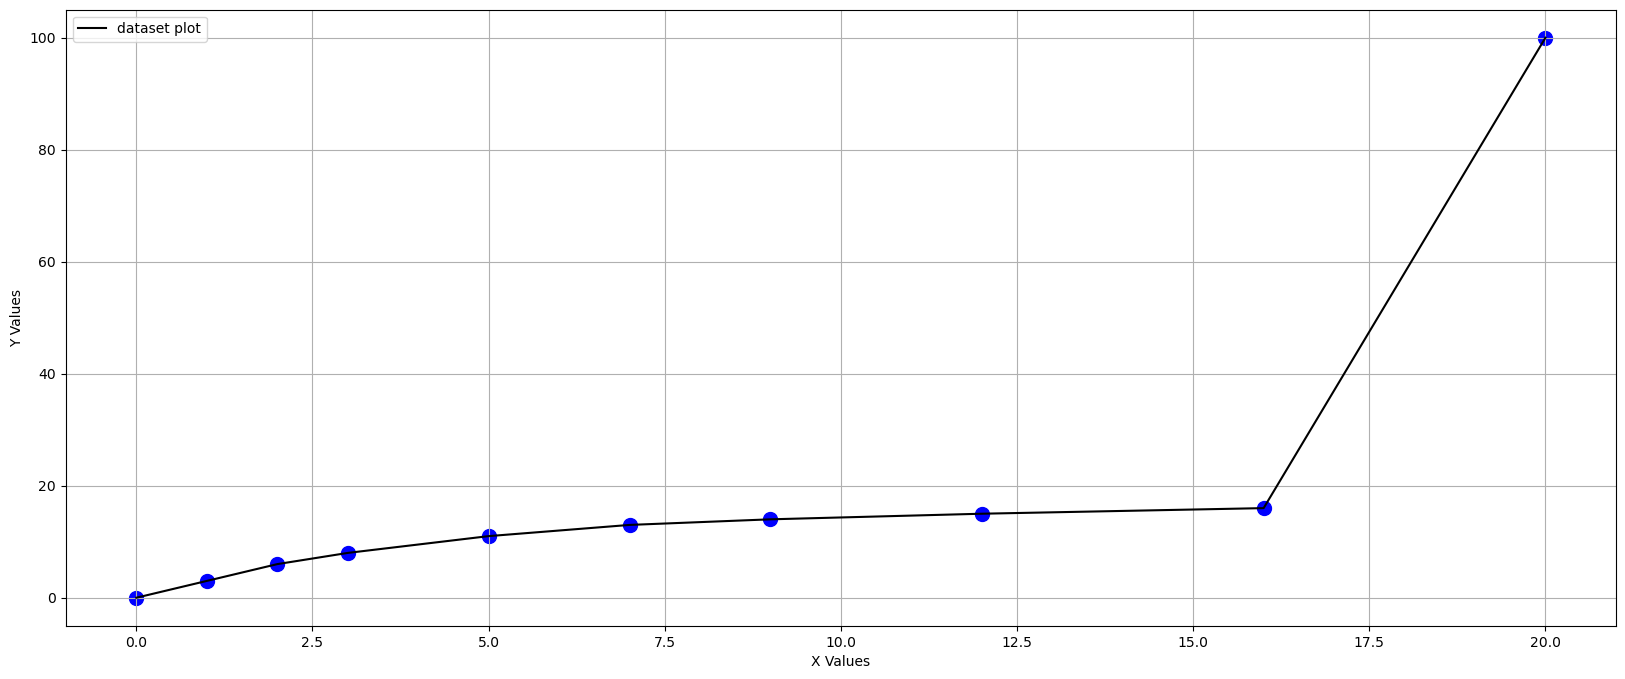

In [213]:
df_3_plot=plot_df(df_3['X'],df_3['Y'])
df_3_plot

In [214]:
pearson_df_3=pearson_corr(df_3['X'],df_3['Y'])
print('The pearson correlation coefficient for dataset 3 is {}'.format(np.round(pearson_df_3,4))) #Dataset 3

The pearson correlation coefficient for dataset 3 is 0.7684


In [215]:
rank_df_3=spearman_corr(df_3['X'],df_3['Y'])
print("The spearman's correlation coefficient for dataset 3 is {}".format(np.round(rank_df_3,4))) #Dataset 3

The spearman's correlation coefficient for dataset 3 is 1.0


In [216]:
kendell_df_3=kendall_tau(df_3['X'],df_3['Y'])
print("The kendell tau's correlation coefficient for dataset 3 is {}".format(np.round(kendell_df_3,4))) #Dataset 3

The kendell tau's correlation coefficient for dataset 3 is 1.0


In [217]:
df_4=df_2.copy()
df_4['Y'][9]=100
df_4 # with changed data from dataset 2,changed value

,X,Y
0,2,8
1,3,4
2,4,9
3,5,2
4,6,5
5,7,6
6,8,3
7,9,1
8,10,7
9,20,100


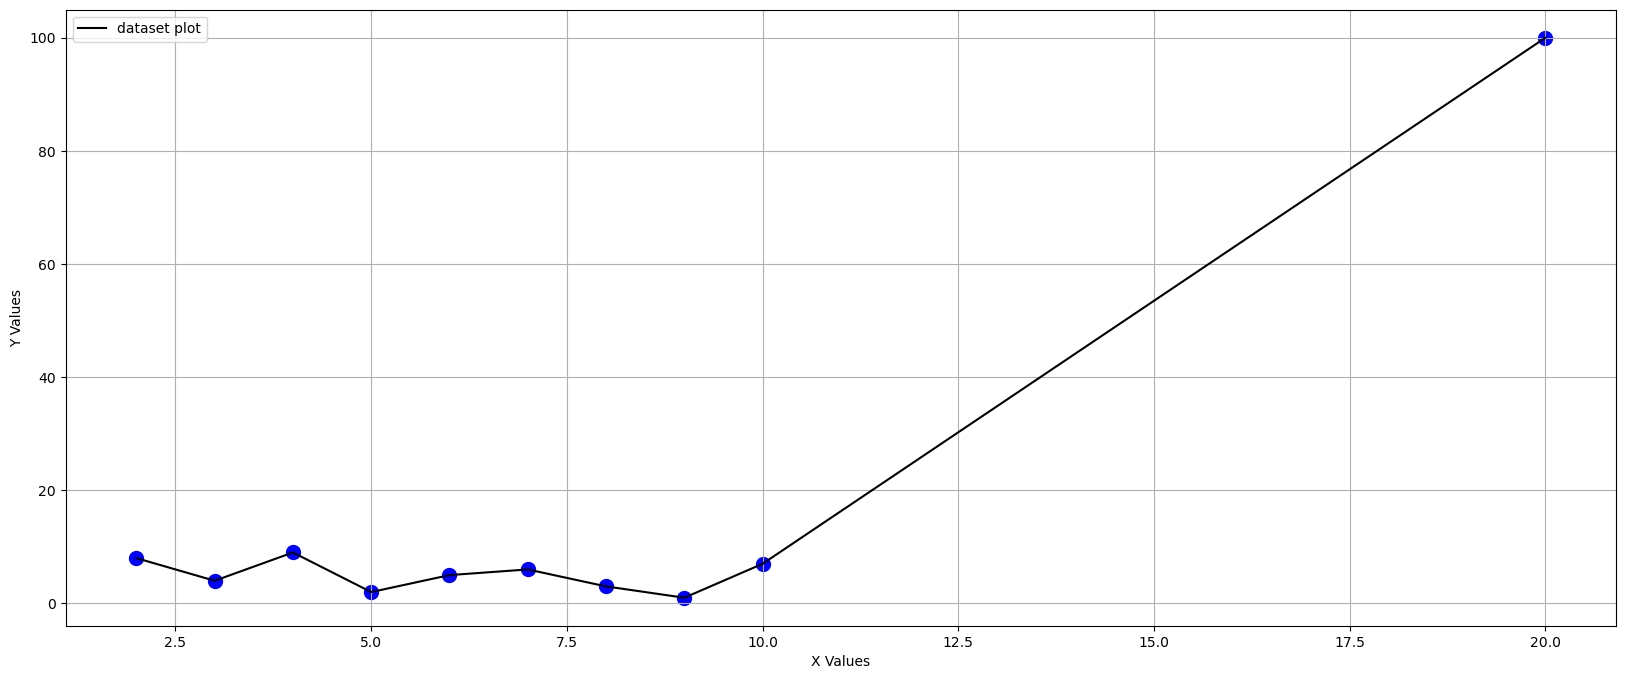

In [218]:
df_4_plot=plot_df(df_4['X'],df_4['Y'])
df_4_plot

In [219]:
pearson_df_4=pearson_corr(df_4['X'],df_4['Y'])
print('The pearson correlation coefficient for dataset 4 is {}'.format(np.round(pearson_df_4,4))) #Dataset 4

The pearson correlation coefficient for dataset 4 is 0.8456


In [220]:
rank_df_4=spearman_corr(df_4['X'],df_4['Y'])
print("The spearman's correlation coefficient for dataset 4 is {}".format(np.round(rank_df_4,4))) #Dataset 4

The spearman's correlation coefficient for dataset 4 is 0.0182


In [221]:
kendell_df_4=kendall_tau(df_4['X'],df_4['Y'])
print("The kendell tau's correlation coefficient for dataset 4 is {}".format(np.round(kendell_df_4,4))) #Dataset 4

The kendell tau's correlation coefficient for dataset 4 is 0.0222


In [222]:
#to create a dataframe of all the correlation coefficients to compare the datasets
correlation_df=pd.DataFrame({'Pearson_Corr':[pearson_df_1,pearson_df_3,pearson_df_2,pearson_df_4],
                             'Spearman_Corr':[rank_df_1,rank_df_3,rank_df_2,rank_df_4],
                             'Kendell_Tau':[kendell_df_1,kendell_df_3,kendell_df_2,kendell_df_4]},
                            index=['dataset_1','dataset_3(changed form 1)','dataset_2','dataset_4(changed from 2)'])
correlation_df

,Pearson_Corr,Spearman_Corr,Kendell_Tau
dataset_1,0.877168,0.993939,0.977778
dataset_3(changed form 1),0.768372,1.000000,1.000000
dataset_2,0.614990,0.018182,0.022222
dataset_4(changed from 2),0.845553,0.018182,0.022222


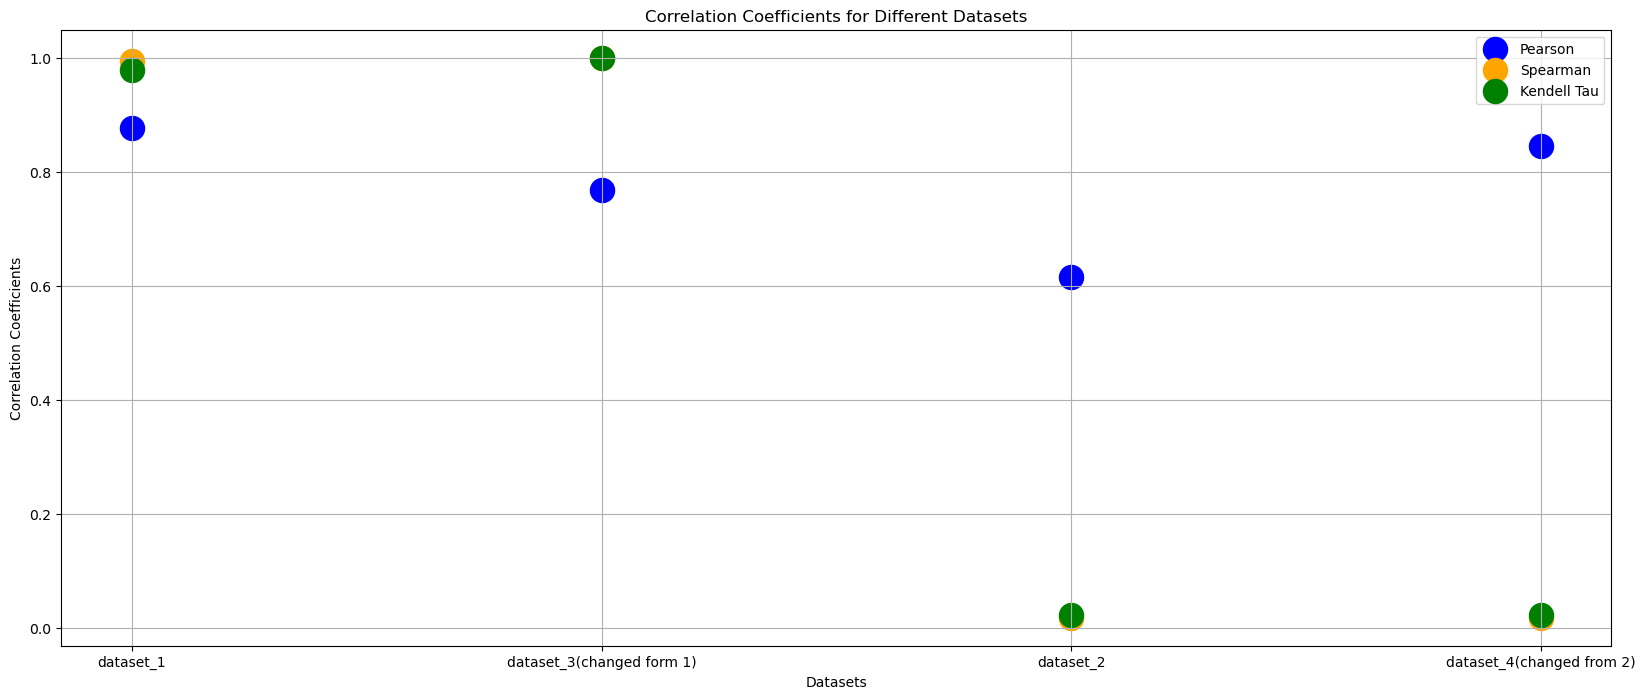

In [223]:
# plot the dataframe
plt.figure(figsize=(20, 8))

# Scatter plot for Pearson correlation
plt.scatter(correlation_df.index, correlation_df['Pearson_Corr'], label='Pearson', color='blue', s=300)

# Scatter plot for Spearman correlation
plt.scatter(correlation_df.index, correlation_df['Spearman_Corr'], label='Spearman', color='orange', s=300)

# Scatter plot for Kendall Tau correlation
plt.scatter(correlation_df.index, correlation_df['Kendell_Tau'], label='Kendell Tau', color='green', s=300)

plt.legend()
plt.grid()
plt.xlabel('Datasets')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation Coefficients for Different Datasets')
plt.show()